In [28]:
import pandas as pd
import glob
import os
import warnings
from tqdm import tqdm
warnings.filterwarnings("ignore")
import matplotlib.pyplot as plt
import seaborn as sns
import spacy
import matplotlib.pyplot as plt
import re
from gensim.models.coherencemodel import CoherenceModel

In [29]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [30]:
dirs=["2020-11","2020-12","2021-01","2021-02"]
li = []
for dir in dirs:
  path="/content/drive/My Drive/CS7641/raw_roBERTa/"
  path+=dir
  all_files = glob.glob(os.path.join(path , "*.csv"))
  for filename in tqdm(all_files):
    df = pd.read_csv(filename, index_col=None, header=0)
    li.append(df)

100%|██████████| 672/672 [00:04<00:00, 165.47it/s]


In [31]:
data_first_wave = pd.concat(li, axis=0, ignore_index=True)
data_first_wave.head()

,Unnamed: 0,created_at,full_text,sentiment_score
0,0,2020-11-02 02:59:54+00:00,RT positive cues for today \nRIL improvement i...,"[{'label': 'Positive', 'score': 0.893498122692..."
1,1,2020-11-02 02:59:54+00:00,RT My colleagues and I will continue to engage...,"[{'label': 'Positive', 'score': 0.631185948848..."
2,2,2020-11-02 02:59:54+00:00,RT This is rally roulette. Check out this vide...,"[{'label': 'Neutral', 'score': 0.8711994886398..."
3,3,2020-11-02 02:59:55+00:00,cont- analytic jobs and AI can do most of that...,"[{'label': 'Negative', 'score': 0.653407394886..."
4,4,2020-11-02 02:59:55+00:00,"RT Danny, we've never met. I know one thing th...","[{'label': 'Neutral', 'score': 0.5582951307296..."


In [32]:
dirs=["2021-12","2022-01"]
li = []
for dir in dirs:
  path="/content/drive/My Drive/CS7641/raw_roBERTa/"
  path+=dir
  all_files = glob.glob(os.path.join(path , "*.csv"))
  for filename in tqdm(all_files):
    df = pd.read_csv(filename, index_col=None, header=0)
    li.append(df)

100%|██████████| 744/744 [00:04<00:00, 149.09it/s]


In [33]:
data_second_wave = pd.concat(li, axis=0, ignore_index=True)
data_second_wave.tail()

,Unnamed: 0,created_at,full_text,sentiment_score
227628,166,2022-01-08 03:00:01+00:00,We will surely break a million cases in one da...,"[{'label': 'Neutral', 'score': 0.5817304253578..."
227629,167,2022-01-08 03:00:01+00:00,RT Having not gotten covid yet feels like I've...,"[{'label': 'Negative', 'score': 0.645866274833..."
227630,168,2022-01-08 03:00:01+00:00,"RT Because, nearly three years into a pandemic...","[{'label': 'Negative', 'score': 0.825582623481..."
227631,169,2022-01-08 03:00:01+00:00,RT This isn't complicated \nPromote vaccines &...,"[{'label': 'Neutral', 'score': 0.6965311169624..."
227632,170,2022-01-08 03:00:01+00:00,RT Having not gotten covid yet feels like I've...,"[{'label': 'Negative', 'score': 0.645866274833..."


In [34]:
# import numpy as np
# # data['created_at']=pd.to_datetime(data['created_at'])
# data['sentiment_score']
# data['created_at']
# # data['created_at']=pd.to_datetime(data['created_at'])
# # data.index[data['sentiment_score'] == "{'neg': 0.0, 'neu': 0.757, 'pos': 0.243, 'compound': 0.5423}"].tolist()
# data['created_at'][228504]
# # data.index[data['sentiment_score']=='nan'].tolist()

In [35]:
# data['created_at'][228504]

In [36]:
data_first_wave=data_first_wave.drop('Unnamed: 0',axis=1)
data_second_wave=data_second_wave.drop('Unnamed: 0',axis=1)

In [37]:
print(data_first_wave.shape)
data_first_wave = data_first_wave[data_first_wave['full_text'].notna()]
data_first_wave.shape

(433073, 3)


(433068, 3)

In [38]:
print(data_second_wave.shape)
data_second_wave = data_second_wave[data_second_wave['full_text'].notna()]
data_second_wave.shape

(227633, 3)


(227631, 3)

In [39]:
def punctRemover(sentence):
    # list the different punctuations
    punctuations = '''\n!()-[]{};:'"\,<>./?@#$%^&*_~'''
    no_punct = ""
    for char in sentence:
        if char not in punctuations:
            no_punct = no_punct + char
    return no_punct

In [40]:
tweets_first_wave=data_first_wave['full_text']
tweets_second_wave=data_second_wave['full_text']
def urlRemover(sentence):
    pattern = r"http\S+"
    return re.sub(pattern,"",sentence)

new_tweets = []
for tweet in tweets_first_wave:
    new_tweets.append(urlRemover(punctRemover(tweet)))
data_first_wave['full_text']=new_tweets

new_tweets = []
for tweet in tweets_second_wave:
    new_tweets.append(urlRemover(punctRemover(tweet)))
data_second_wave['full_text']=new_tweets

In [41]:
import gensim
from gensim.utils import simple_preprocess
from gensim.parsing.preprocessing import STOPWORDS
from nltk.stem import WordNetLemmatizer, SnowballStemmer
from nltk.stem.porter import *
import numpy as np
np.random.seed(2022)
import nltk
nltk.download('wordnet')
nltk.download('omw-1.4')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

In [42]:
def lemmatize(text):
    return WordNetLemmatizer().lemmatize(text, pos='v')
def preprocess(text):
    result = []
    for token in gensim.utils.simple_preprocess(text):
        if token not in gensim.parsing.preprocessing.STOPWORDS and len(token) > 3:
            result.append(lemmatize(token))
    return result

In [43]:
processed_tweets_first_wave = data_first_wave['full_text'].map(preprocess)
processed_tweets_second_wave = data_second_wave['full_text'].map(preprocess)

In [44]:
lexicon_first_wave = gensim.corpora.Dictionary(processed_tweets_first_wave)
bow_corpus_first_wave = [lexicon_first_wave.doc2bow(doc) for doc in processed_tweets_first_wave]

lexicon_second_wave = gensim.corpora.Dictionary(processed_tweets_second_wave)
bow_corpus_second_wave = [lexicon_second_wave.doc2bow(doc) for doc in processed_tweets_second_wave]

In [45]:
lda_model_first_wave = gensim.models.LdaMulticore(bow_corpus_first_wave, num_topics=3,id2word=lexicon_first_wave, passes=2, workers=2)

lda_model_second_wave = gensim.models.LdaMulticore(bow_corpus_second_wave, num_topics=3,id2word=lexicon_second_wave, passes=2, workers=2)

In [46]:
text_first_wave = ""
text_second_wave = ""

for idx, topic in lda_model_first_wave.print_topics(-1):
    t_list=topic.split("+")
    t_list=[t[t.index('"')+1:t.rfind('"')] for t in t_list]
    text_first_wave+=" ".join(t_list)
    text_first_wave+=" "
    print('Topic: {} \nWords: {}'.format(idx, topic))
print("\n\n")


for idx, topic in lda_model_second_wave.print_topics(-1):
    t_list=topic.split("+")
    t_list=[t[t.index('"')+1:t.rfind('"')] for t in t_list]
    text_second_wave+=" ".join(t_list)
    text_second_wave+=" "
    print('Topic: {} \nWords: {}'.format(idx, topic))

Topic: 0 
Words: 0.046*"covid" + 0.020*"vaccine" + 0.020*"pandemic" + 0.007*"health" + 0.007*"vaccines" + 0.005*"help" + 0.005*"coronavirus" + 0.005*"need" + 0.005*"vaccination" + 0.004*"work"
Topic: 1 
Words: 0.020*"covid" + 0.019*"lockdown" + 0.016*"pandemic" + 0.011*"people" + 0.011*"mask" + 0.010*"home" + 0.008*"like" + 0.008*"dont" + 0.007*"stay" + 0.007*"wear"
Topic: 2 
Words: 0.063*"covid" + 0.015*"case" + 0.012*"people" + 0.012*"test" + 0.012*"coronavirus" + 0.009*"deaths" + 0.009*"say" + 0.008*"state" + 0.007*"virus" + 0.007*"die"



Topic: 0 
Words: 0.036*"covid" + 0.015*"vaccine" + 0.015*"people" + 0.010*"like" + 0.010*"pandemic" + 0.010*"dont" + 0.008*"go" + 0.008*"know" + 0.007*"think" + 0.007*"say"
Topic: 1 
Words: 0.059*"covid" + 0.023*"omicron" + 0.019*"case" + 0.014*"test" + 0.009*"report" + 0.009*"deaths" + 0.008*"positive" + 0.008*"variant" + 0.007*"people" + 0.006*"number"
Topic: 2 
Words: 0.043*"covid" + 0.012*"mask" + 0.011*"test" + 0.011*"pandemic" + 0.010*"vacci

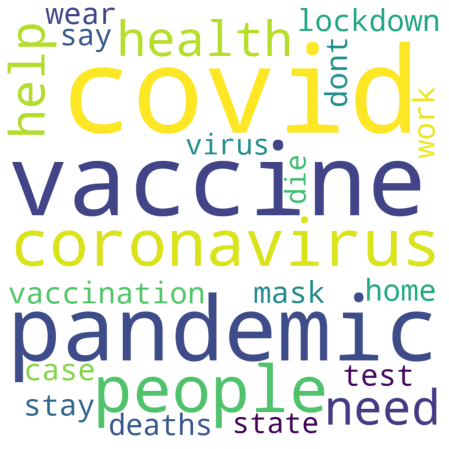

In [47]:
from wordcloud import WordCloud
wordcloud = WordCloud(width = 800, height = 800,background_color ='white',min_font_size = 10).generate(text_first_wave)
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

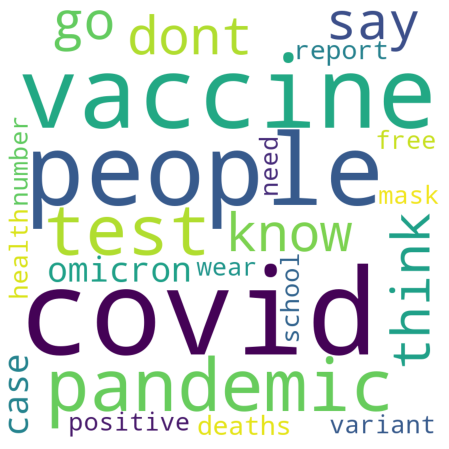

In [48]:
from wordcloud import WordCloud
wordcloud = WordCloud(width = 800, height = 800,background_color ='white',min_font_size = 10).generate(text_second_wave)
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

In [49]:
!pip install pyLDAvis

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [50]:
import pyLDAvis
import pyLDAvis.gensim_models as gensimvis
pyLDAvis.enable_notebook()

# feed the LDA model into the pyLDAvis instance
lda_viz_first_wave = gensimvis.prepare(lda_model_first_wave, bow_corpus_first_wave, lexicon_first_wave)
lda_viz_first_wave

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
1      0.166440  0.146521       1        1  35.288122
0      0.054801 -0.205779       2        1  33.907266
2     -0.221240  0.059258       3        1  30.804611, topic_info=         Term           Freq          Total Category  logprob  loglift
520   vaccine   30285.000000   30285.000000  Default  30.0000  30.0000
96   lockdown   28849.000000   28849.000000  Default  29.0000  29.0000
100      case   19531.000000   19531.000000  Default  28.0000  28.0000
54      covid  182926.000000  182926.000000  Default  27.0000  27.0000
577      mask   16058.000000   16058.000000  Default  26.0000  26.0000
..        ...            ...            ...      ...      ...      ...
224     house    3982.371064    6365.374384   Topic3  -5.8128   0.7085
801   million    3968.221915    6573.948394   Topic3  -5.8164   0.6727
40   pandemic    5369.456437   58655.638014   Topic3  -5.5140  -1.2135
142    health    4406.764895   16154.124045   Topic3  -5.7115  -0.1215
11      today    4245.549526   11398.758219   Topic3  -5.7488   0.1899

[243 rows x 6 columns], token_table=      Topic      Freq        Term
term                             
1778      1  0.006466      access
1778      2  0.993449      access
2067      2  0.999393  administer
536       2  0.000160   americans
536       3  0.999816   americans
...     ...       ...         ...
278       2  0.276970        year
278       3  0.174259        year
362       1  0.992456       youre
362       2  0.000224       youre
362       3  0.007385       youre

[412 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[2, 1, 3])

In [51]:
lda_viz_second_wave = gensimvis.prepare(lda_model_second_wave, bow_corpus_second_wave, lexicon_second_wave)
lda_viz_second_wave

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
0      0.181808  0.113024       1        1  38.191391
2      0.020589 -0.194742       2        1  32.624258
1     -0.202396  0.081717       3        1  29.184352, topic_info=         Term          Freq         Total Category  logprob  loglift
121   omicron  14464.000000  14464.000000  Default  30.0000  30.0000
191      case  11856.000000  11856.000000  Default  29.0000  29.0000
28       mask   9910.000000   9910.000000  Default  28.0000  28.0000
352      dont   8164.000000   8164.000000  Default  27.0000  27.0000
505      like   9058.000000   9058.000000  Default  26.0000  26.0000
..        ...           ...           ...      ...      ...      ...
87   pandemic   3222.969066  19977.556598   Topic3  -5.2885  -0.5928
35       days   2233.707696   4380.275416   Topic3  -5.6551   0.5581
30       time   2531.852406   9292.313313   Topic3  -5.5299  -0.0687
665      risk   1983.801572   3200.269941   Topic3  -5.7738   0.7533
247    health   2036.387912   7747.231307   Topic3  -5.7476  -0.1046

[263 rows x 6 columns], token_table=      Topic      Freq        Term
term                             
482       1  0.001158      access
482       2  0.998342      access
482       3  0.001158      access
3754      2  0.998646  administer
248       3  0.998376      africa
...     ...       ...         ...
481       2  0.162179       years
481       3  0.205079       years
959       1  0.926144       youre
959       2  0.068396       youre
959       3  0.005583       youre

[495 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[1, 3, 2])

In [52]:
coherence_model_lda_first_wave = CoherenceModel(model=lda_model_first_wave,texts=processed_tweets_first_wave,dictionary=lexicon_first_wave, coherence='u_mass')
coherence_lda_first_wave = coherence_model_lda_first_wave.get_coherence()
print('UMass Coherence Score for First Wave ', coherence_lda_first_wave)

coherence_model_lda_first_wave = CoherenceModel(model=lda_model_first_wave,texts=processed_tweets_first_wave,dictionary=lexicon_first_wave, coherence='c_v')
coherence_lda_first_wave = coherence_model_lda_first_wave.get_coherence()
print('CV Coherence Score for First Wave ', coherence_lda_first_wave)

coherence_model_lda_first_wave = CoherenceModel(model=lda_model_first_wave,texts=processed_tweets_first_wave,dictionary=lexicon_first_wave, coherence='c_uci')
coherence_lda_first_wave = coherence_model_lda_first_wave.get_coherence()
print('UCI Coherence Score for First Wave ', coherence_lda_first_wave)

UMass Coherence Score for First Wave  -3.5207045805232373
CV Coherence Score for First Wave  0.29284829359273257
UCI Coherence Score for First Wave  0.04519712076840573


In [54]:
coherence_model_lda_second_wave = CoherenceModel(model=lda_model_second_wave,texts=processed_tweets_second_wave,dictionary=lexicon_second_wave, coherence='u_mass')
coherence_lda_second_wave = coherence_model_lda_second_wave.get_coherence()
print('UMass Coherence Score for Second Wave ', coherence_lda_second_wave)

coherence_model_lda_second_wave = CoherenceModel(model=lda_model_second_wave,texts=processed_tweets_second_wave,dictionary=lexicon_second_wave, coherence='c_v')
coherence_lda_second_wave = coherence_model_lda_second_wave.get_coherence()
print('CV Coherence Score for Second Wave ', coherence_lda_second_wave)

coherence_model_lda_second_wave = CoherenceModel(model=lda_model_second_wave,texts=processed_tweets_second_wave,dictionary=lexicon_second_wave, coherence='c_uci')
coherence_lda_second_wave = coherence_model_lda_second_wave.get_coherence()
print('UCI Coherence Score for Second Wave ', coherence_lda_second_wave)

UMass Coherence Score for Second Wave  -3.5710463616209993
CV Coherence Score for Second Wave  0.27367338565377036
UCI Coherence Score for Second Wave  -0.023986337590590354
